 Selecciona tu archivo Cancer_Data.csv


Saving Cancer_Data.csv to Cancer_Data (3).csv
 Dataset cargado con éxito
Primeras filas del dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280   

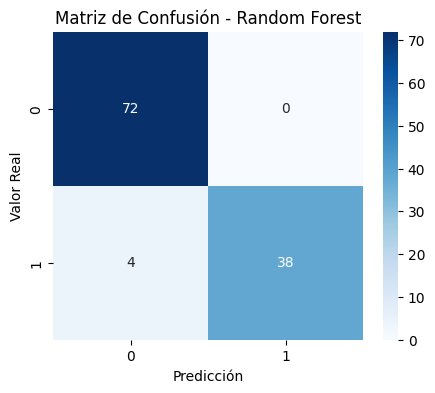


 Top 10 características más importantes para el modelo:
          Característica  Importancia
22       perimeter_worst     0.164179
27  concave points_worst     0.149669
20          radius_worst     0.101680
7    concave points_mean     0.098285
23            area_worst     0.087607
3              area_mean     0.065158
6         concavity_mean     0.044959
13               area_se     0.037119
0            radius_mean     0.036510
2         perimeter_mean     0.029810


/tmp/ipython-input-3034861073.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(10), x="Importancia", y="Característica", palette="viridis")


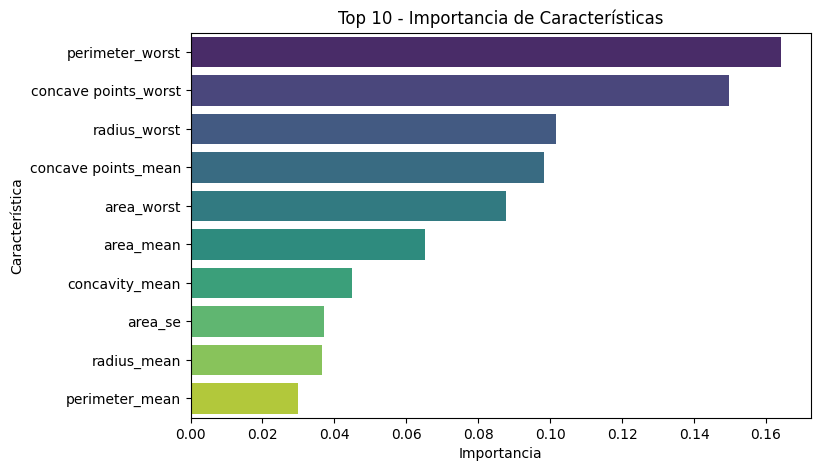

In [5]:
# ==========================================
# Random Forest - Clasificación de Cáncer
# Explicado paso a paso
# ==========================================

# 1. Importar librerías necesarias
# --------------------------------------------------------------------
# pandas: para manejar los datos en forma de tabla (como Excel en Python).
# train_test_split: divide el dataset en entrenamiento y prueba.
# RandomForestClassifier: el modelo de bosque aleatorio (Random Forest).
# classification_report y confusion_matrix: métricas para evaluar el modelo.
# matplotlib & seaborn: librerías de gráficos para visualizar resultados.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Subir el archivo CSV a Google Colab
# --------------------------------------------------------------------
# Google Colab no tiene acceso a tus archivos locales.
# Por eso, usamos "files.upload()" para elegir el archivo Cancer_Data.csv
# desde tu computadora y cargarlo al entorno de Colab.
from google.colab import files
print(" Selecciona tu archivo Cancer_Data.csv")
uploaded = files.upload()

# 3. Leer el dataset
# --------------------------------------------------------------------
# Una vez cargado el archivo, lo leemos con pandas.
# Esto nos da un DataFrame: una tabla con filas (muestras) y columnas (características).
df = pd.read_csv(list(uploaded.keys())[0])
print(" Dataset cargado con éxito")
print("Primeras filas del dataset:")
print(df.head())

# 4. Preprocesamiento de los datos
# --------------------------------------------------------------------
# Antes de entrenar un modelo, siempre hay que limpiar/preparar los datos.

# (a) Eliminar la columna "id":
#    Esa columna solo es un identificador, no aporta información útil.
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

# (b) Convertir la columna "diagnosis":
#    Actualmente tiene valores "M" (Maligno) y "B" (Benigno).
#    Como las máquinas trabajan mejor con números, la convertimos:
#    M = 1 (cáncer maligno), B = 0 (cáncer benigno).
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# (c) Separar variables:
#    - X = todas las características (ej: radio, textura, perímetro, etc.)
#    - y = la variable que queremos predecir (diagnosis).
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

print("\n Dimensiones del dataset:")
print(f"Características (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")

# 5. Dividir datos en entrenamiento y prueba
# --------------------------------------------------------------------
# Para saber si el modelo funciona, lo entrenamos con una parte del dataset (80%)
# y lo probamos con datos que no ha visto antes (20%).
# Esto evita que el modelo "se copie" de memoria y nos asegura que generaliza bien.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n Datos divididos:")
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

# 6. Entrenar el modelo Random Forest
# --------------------------------------------------------------------
# Random Forest es un algoritmo que combina muchos "árboles de decisión".
# Cada árbol toma decisiones simples (ej: "si el radio es mayor a 15, clasifica como M").
# El bosque junta la opinión de todos los árboles y vota por el resultado final.
# Usamos 100 árboles (n_estimators=100) para mayor robustez.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("\n Modelo Random Forest entrenado con 100 árboles.")

# 7. Hacer predicciones con datos de prueba
# --------------------------------------------------------------------
# Ahora usamos el modelo para predecir el tipo de cáncer
# en los pacientes que no fueron usados en el entrenamiento.
y_pred = model.predict(X_test)

# 8. Evaluar el modelo
# --------------------------------------------------------------------
# (a) Matriz de confusión:
#     Una tabla que compara predicciones vs. valores reales.
#     Nos dice cuántos casos predijimos bien y cuántos mal.
# (b) Reporte de clasificación:
#     Incluye métricas como:
#       - Precisión (Precision): cuántos positivos predichos eran correctos.
#       - Recall: cuántos positivos reales detectó el modelo.
#       - F1-score: equilibrio entre precisión y recall.
#       - Accuracy: porcentaje de aciertos totales.
print("\n MATRIZ DE CONFUSIÓN:\n", confusion_matrix(y_test, y_pred))
print("\n REPORTE DE CLASIFICACIÓN:\n", classification_report(y_test, y_pred))

# 9. Visualizar la matriz de confusión
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

# 10. Importancia de las características
# --------------------------------------------------------------------
# Una gran ventaja de Random Forest es que nos dice qué variables
# son más importantes para clasificar.
# Por ejemplo: el radio y el perímetro suelen ser claves en tumores malignos.
importances = pd.DataFrame({
    "Característica": X.columns,
    "Importancia": model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("\n Top 10 características más importantes para el modelo:")
print(importances.head(10))

# 11. Visualizar las características más importantes
plt.figure(figsize=(8,5))
sns.barplot(data=importances.head(10), x="Importancia", y="Característica", palette="viridis")
plt.title("Top 10 - Importancia de Características")
plt.show()
